In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("updated_dataset.csv")
data

,title,rating,body,y,cleaned_reviews
0,Unreliable earphones with high cost,1.0,this earphones are unreliable i bought it bef...,0,earphon unreli bought day meanwhil right side ...
1,Honest review of an edm music lover,3.0,no doubt it has a great bass and to a great ex...,1,doubt great bass great extent nois cancel dece...
2,Really good and durable.,4.0,i bought itfor 999i purchased it second time g...,2,bought itfor purchas second time gift first on...
3,"A good earphone but with some issues, read thi...",4.0,ill get straight to the pros and cons of boat ...,2,ill get straight pro con boat rockerz pro blue...
4,Charging port not working,1.0,after 11 days the charging port isnt working a...,0,day charg port isnt work cant even return wat ...
...,...,...,...,...,...
4995,Rate are upto mark,4.0,little rusty packing but product is good this ...,2,littl rusti pack product good first purchas bo...
4996,Only working in 2 Months No service centre in ...,2.0,last july 7 i purchased boat 255 bluetooth hea...,0,last juli purchas boat bluetooth headset rd st...
4997,"Thumbs up for sound , double thumbs down for b...",2.0,i reduced two stars from my average because of...,0,reduc two star averag batteri life last hour w...
4998,Very poor noise cancellation,1.0,the major drawback is no noise cancellation at...,0,major drawback nois cancel opposit person alwa...


In [3]:
# Changes the overall category to categorical from numerical for easier visualizations
data["classes"] = data["rating"]
data["classes"].replace({5.0: "positive",4.0:"positive",3.0:"neutral",2.0:"negative",1.0:"negative"}, inplace=True)
data["classes"].unique()

array(['negative', 'neutral', 'positive'], dtype=object)

In [4]:
data['classes'].value_counts()

positive    2405
negative    1786
neutral      809
Name: classes, dtype: int64

In [5]:
data

,title,rating,body,y,cleaned_reviews,classes
0,Unreliable earphones with high cost,1.0,this earphones are unreliable i bought it bef...,0,earphon unreli bought day meanwhil right side ...,negative
1,Honest review of an edm music lover,3.0,no doubt it has a great bass and to a great ex...,1,doubt great bass great extent nois cancel dece...,neutral
2,Really good and durable.,4.0,i bought itfor 999i purchased it second time g...,2,bought itfor purchas second time gift first on...,positive
3,"A good earphone but with some issues, read thi...",4.0,ill get straight to the pros and cons of boat ...,2,ill get straight pro con boat rockerz pro blue...,positive
4,Charging port not working,1.0,after 11 days the charging port isnt working a...,0,day charg port isnt work cant even return wat ...,negative
...,...,...,...,...,...,...
4995,Rate are upto mark,4.0,little rusty packing but product is good this ...,2,littl rusti pack product good first purchas bo...,positive
4996,Only working in 2 Months No service centre in ...,2.0,last july 7 i purchased boat 255 bluetooth hea...,0,last juli purchas boat bluetooth headset rd st...,negative
4997,"Thumbs up for sound , double thumbs down for b...",2.0,i reduced two stars from my average because of...,0,reduc two star averag batteri life last hour w...,negative
4998,Very poor noise cancellation,1.0,the major drawback is no noise cancellation at...,0,major drawback nois cancel opposit person alwa...,negative


In [6]:
data.isna().sum()

title              1
rating             0
body               0
y                  0
cleaned_reviews    3
classes            0
dtype: int64

In [7]:
data=data.dropna()

In [8]:
data.isna().sum()

title              0
rating             0
body               0
y                  0
cleaned_reviews    0
classes            0
dtype: int64

In [9]:
import spacy
print(spacy.__version__)

3.2.1


In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
import en_core_web_sm  
import spacy
import re
nlp = spacy.load("en_core_web_md")

In [12]:
def normalize(msg):
    msg = re.sub('[^A-Za-z]+', ' ', msg) #remove special character and intergers
    doc = nlp(msg)
    res=[]
    for token in doc:
        if(token.is_stop or token.is_punct or token.is_currency or token.is_space or len(token.text) <= 2): #word filteration
            pass
        else:
            res.append(token.lemma_.lower())
    return res

data["cleaned_reviews_1"] = data["cleaned_reviews"].apply(normalize)
data.head()

,title,rating,body,y,cleaned_reviews,classes,cleaned_reviews_1
0,Unreliable earphones with high cost,1.0,this earphones are unreliable i bought it bef...,0,earphon unreli bought day meanwhil right side ...,negative,"[earphon, unreli, buy, day, meanwhil, right, e..."
1,Honest review of an edm music lover,3.0,no doubt it has a great bass and to a great ex...,1,doubt great bass great extent nois cancel dece...,neutral,"[doubt, great, bass, great, extent, nois, canc..."
2,Really good and durable.,4.0,i bought itfor 999i purchased it second time g...,2,bought itfor purchas second time gift first on...,positive,"[buy, itfor, purchas, second, time, gift, brot..."
3,"A good earphone but with some issues, read thi...",4.0,ill get straight to the pros and cons of boat ...,2,ill get straight pro con boat rockerz pro blue...,positive,"[ill, straight, pro, con, boat, rockerz, pro, ..."
4,Charging port not working,1.0,after 11 days the charging port isnt working a...,0,day charg port isnt work cant even return wat ...,negative,"[day, charg, port, work, return, wat, know, ye..."


In [13]:
# words count
from collections import Counter
words_collection = Counter([words for subtext in data['cleaned_reviews_1'] for words in subtext])
most_common = pd.DataFrame(words_collection.most_common(50))
most_common.columns = ['most_common_word','count']
most_common

,most_common_word,count
0,good,4662
1,product,3829
2,qualiti,3655
3,sound,3320
4,use,2973
5,batteri,2280
6,earphon,1972
7,boat,1908
8,buy,1765
9,work,1734


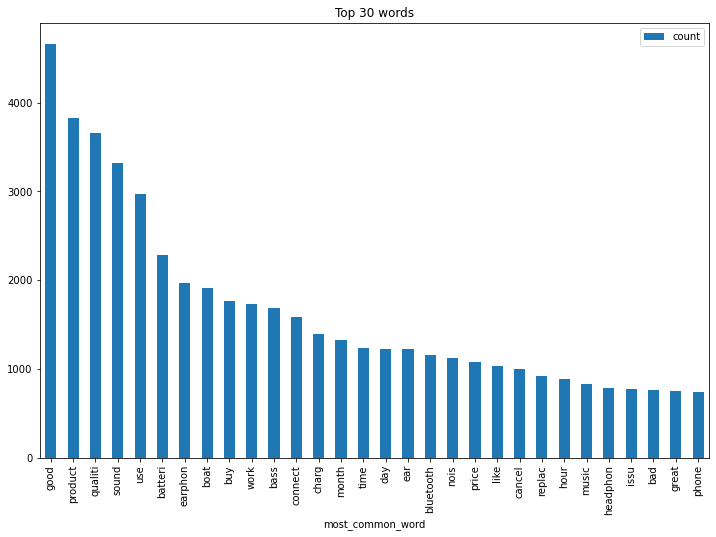

In [14]:
#Visualizing results (Barchart for top 30 words)
most_common[0:30].plot.bar(x='most_common_word',figsize=(12,8),title='Top 30 words');

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

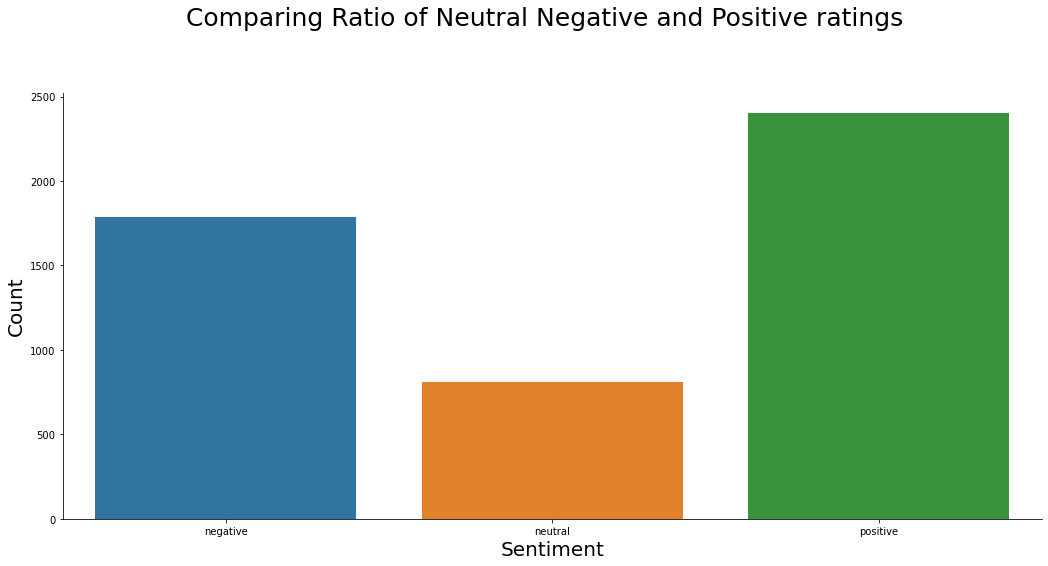

In [16]:
# Distribution of sentiment class
fig, axes = plt.subplots(1, figsize=(15,8))
fig.suptitle("Comparing Ratio of Neutral Negative and Positive ratings", fontsize = 25)
plt.tight_layout(pad = 3.5)
sns.countplot(x = "classes", data = data)
axes.set_xlabel("Sentiment", fontsize = 20)
axes.set_ylabel("Count", fontsize = 20)
sns.despine()

In [17]:
def pert_count(data, category):
    return (len(data[data["classes"] == category])/len(data)) * 100

In [18]:
print(f"Percentage of neutral words  {pert_count(data, 'neutral')} %")
print(f"Percentage of negative words  {pert_count(data, 'negative')} %")
print(f"Percentage of positive words  {pert_count(data, 'positive')} %")

Percentage of neutral words  16.172938350680543 %
Percentage of negative words  35.748598879103284 %
Percentage of positive words  48.07846277021618 %


In [19]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [20]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "black",
    max_font_size = 40,
    max_words = 200,
    stopwords = stopwords,
    scale = 3).generate(str(data))
    fig = plt.figure(figsize = (7.5, 7.5))
    plt.axis("off")
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.25)
    plt.imshow(wordcloud)
    plt.show()

In [21]:
# seperating all records into a different variable to generate wordcloud based on category
neu=data[data["classes"] == "neutral"]["cleaned_reviews"]
neg=data[data["classes"] == "negative"]["cleaned_reviews"]
pos=data[data["classes"] == "positive"]["cleaned_reviews"]

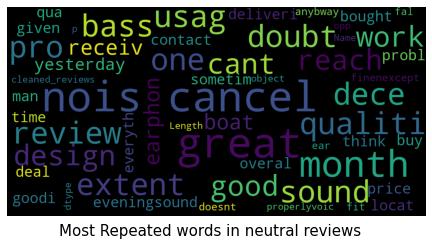

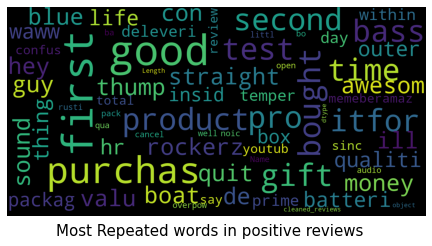

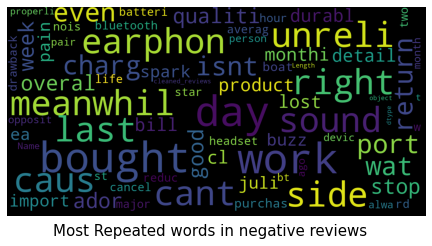

In [22]:
# Generating wordcloud based on category
word_cloud(neu, "Most Repeated words in neutral reviews")
word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(neg, "Most Repeated words in negative reviews")

In [23]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer

In [24]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2),stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

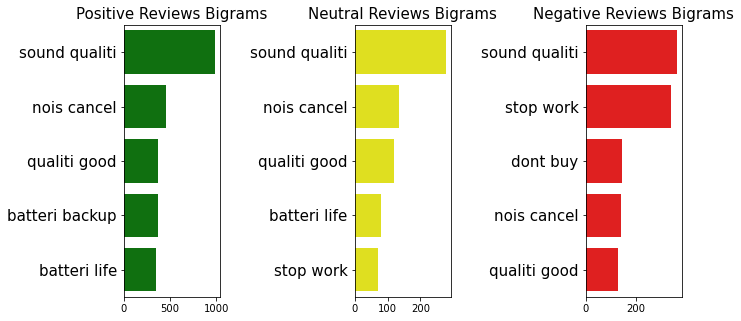

In [25]:
# create a function for bigram plots
def n_gram_plot(data,title,color):
    x=[x[0] for x in data]
    y=[x[1] for x in data]
    sns.barplot(y,x,color='{}'.format(color))
    plt.title('{} Reviews Bigrams'.format(title),fontsize=15)
    plt.yticks(rotation=0,fontsize=15)

common_words_good = get_top_n_bigram(pos, 5)
common_words_neutral= get_top_n_bigram(neu, 5)
common_words_bad= get_top_n_bigram(neg, 5)

# bigram plot using function above
plt.figure(figsize=(10,5))
# good reviews bigrams
plt.subplot(151)
n_gram_plot(common_words_good,'Positive','green')

#neutral reviews bigrams
plt.subplot(153)
n_gram_plot(common_words_neutral,'Neutral','yellow')

#bad reviews bigrams
plt.subplot(155)
n_gram_plot(common_words_bad,'Negative','red')
plt.show()

In [26]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

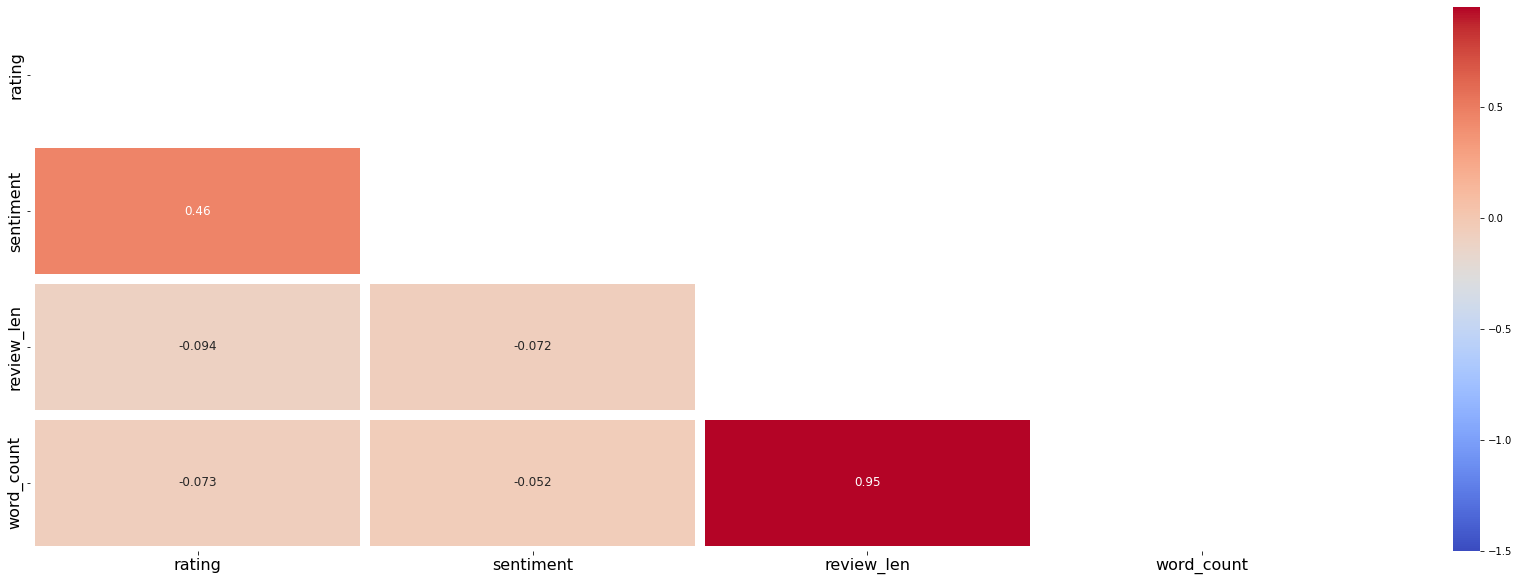

In [32]:
data['word_count'] = data["title"].apply(lambda x: len(str(x).split(" ")))
data['review_len'] =data["title"].apply(lambda x: len(str(x)))

# visualising the heatmap
correlation = data[['rating','sentiment', 'review_len', 'word_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 12}, linewidths=10, vmin=-1.5, mask=mask)